# Matplotlib
***
<br>

[Official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)

## What is it?
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python programming language [3].<br>
The library utilises a tree-like hierarchy structure to store its objects for each plot [2]. Matplotlib is a free open-sourced library<br>
which is continually improving. 

## Brief History
Matplotlib development started in the early 2000’s by John D. Hunter, a neurobiologist that emulated MATLAB’s capabilities to help<br> 
visualize electronic signals in the brain of epilepsy patients[1]. Despite MATLAB’s limitations, it’s approach to plotting was retained<br>
in the pyplot sub module which was developed to interface with Matplotlib through a collection of functions [3]. 

<br>

## Pyplot
***
### Overview
This sub module is typically imported from the Matplotlib library under the “plt”alias name and can carry out the majority of Matplotlib’s<br> 
plotting capabilities with relatively intuitive syntax.<br>

Plotting via pyplot is considered the stateful approach to plotting with Matplotlib, where calls are made via plt.plot() and other top level<br>
pyplot functions which preserve states to keep track of the current figure and axes [2]. As described in RealPython (2018, Stateful Versus<br>
Stateless Approaches) the simplicity of pyplot’s plotting syntax can be attributed to its wrapper functions that essentially call Matplotlib’s<br>
more complicated object orientated interface.

<br>

### Plotting
Functions can be found here: [pyplot functions](https://matplotlib.org/stable/api/pyplot_summary.html)

The pyplot library can do many different plots via different functions calls. The arguments accepted by the different pyplot plots are<br>
relatively similar, but for simplicity a worked example of a line plot will be explored.



<br>

#### Breakdown of plt.plot()
[Documentation:](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)  _matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)_

This *plot* functon:
- Accepts list of arguements (**args*) which can form a 2d-array via:
  - Lists of equal lengths (as used in *line_plot* function).
  - Numpy arrays of equal length.
  - Keyword strings, such as  reference to pandas dataframe columns.
-  View limits autoscale to data limits by default as scalex and scaley are set to True. This can be altered in the function or after the fact.
-  Data input is defaulted to None but one can pass data object if the object variables are declared.
-  Keyword arguements (***kwargs*) declared in or passed into the *plt.plot()* can format properties  like linewidth and marker color.<br>
One can also use shortcut string notation for some formatting operations (as used in *line_plot* function below, e.g blue dashes line = 'b--').


In [1]:
# Import the necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt               # for plotting
import numpy as np                            # for numerical operations

# default figure sizes of future plots in the notebook
plt.rcParams['figure.figsize'] = [10, 6]      

Text(0.5, 0.0, 'Figure 1')

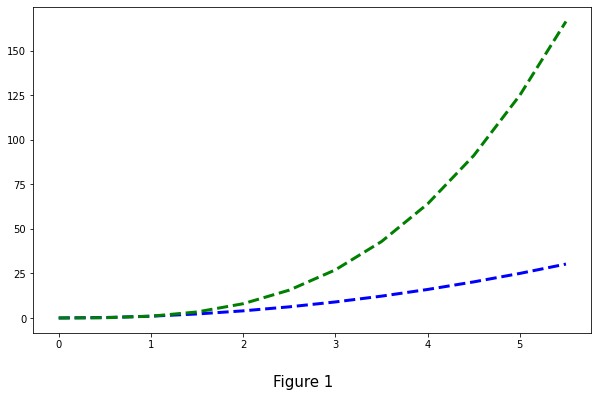

In [2]:

# define plot variables
x = np.arange(0, 6, 0.5)                      # generate list of 0-5 in increments of 0.5
y1 = x ** 2
y2 = x ** 3
y3 = x ** 4

#define plot labels
xy1_label = 'f(x)=x'
xy2_label = 'g(x)=x^2'
xy3_label = 'h(x)=x^3'

def line_plot():   
# pass the following arguements into plot function():
    # x and y lists of equal length
    # Shorthand string notation for colour / linestyle
    # linewidth value & label string (later used to format legend)
    plt.plot(x, y1, 'b--', linewidth = 3, label = xy1_label)  
    plt.plot(x, y2, 'g--', linewidth = 3, label = xy2_label) 
    
line_plot()

# Add Figure Reference
plt.figtext(0.5, 0.0, 'Figure 1', wrap = True, horizontalalignment = 'center', fontsize = 15)  

#### Additional Formatting 

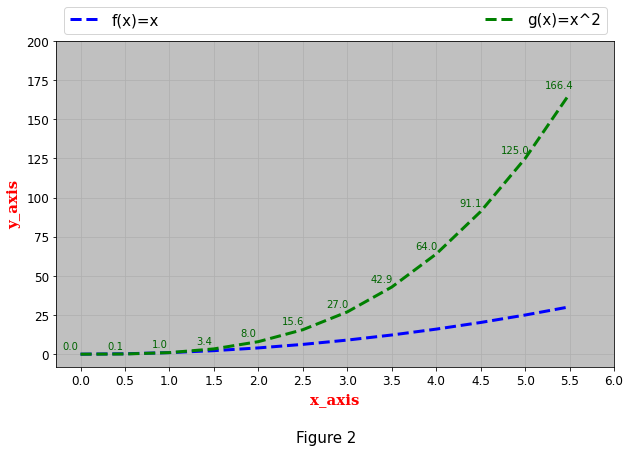

In [3]:
# Additional plot formatting (declared outside of the plot function)

plt.clf() #clear current figure


def format_plot():
    
    # plot format variables
    x_axis_label = 'x_axis'
    y_axis_label = 'y_axis'
    default_fontsize = 12
    label_pad = 5
    axis_font = {'family': 'serif',
        'color':  'red',
        'weight': 'bold',
        'size': 15,
        }

    # set axis labels, declare fontsize and distance from axis (labelpad)
    plt.xlabel(x_axis_label, fontdict = axis_font, labelpad = label_pad)
    plt.ylabel(y_axis_label, fontdict = axis_font, labelpad = label_pad)
    
    # alter scaling of y axis (this can be done in plot function either)
    plt.ylim(top = 200)
    
    # set fontsize of axis labels
    plt.xticks(fontsize = default_fontsize)
    plt.yticks(fontsize = default_fontsize)
    
    # alter tick frequency of x-axis to 0.5
    plt.xticks(np.arange(min(x), max(x) + 1, 0.5))
    
    # set current axis to a variable to call functions on it
    ax = plt.gca()                          # define ax variable as current axes if it exists
    ax.set_facecolor('silver')              # call set_facecolur method current axes
    ax.grid()                               # apply grid to current axes
    
    # annotate datapoint labels on data series
    # loop over index & val of series, then add text via annotate function
    # Adopted from: https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
    for index, value in enumerate(y2):
        value = value.round(1)
        ax.annotate(value, (x[index], y2[index]), textcoords = "offset points", xytext = (-10, 5), ha = 'center',
                    color = 'darkgreen')
    
    # Place a legend on the current Axes (labels taken from artist as label declared in plot function)
    # Note: labels can also be passed as a list to plt.legend() 
        # bbox_to_anchor and loc are used together to position legend
        # mode set to expand stretches legend accross axes length
        # borderaxespad control distance between legend and legend border
    ax.legend(bbox_to_anchor = (0, 1, 1, 0.2), loc = "lower left", mode = "expand",
               borderaxespad = 0.5, ncol = 3, fontsize = 15)

line_plot()   
format_plot()
plt.figtext(0.5, -0.05, 'Figure 2', wrap = True, horizontalalignment = 'center', fontsize = 15);

#### Preserving States

When looking at Figure 1 above, the *lineplot()* function plotted two series via two consecutive *plot()* calls. This is an example of how the pyplot<br>
module can make it easier to plot. Pyplot can preserve various states enabling it to keep track of the current figure, whereby functions called are<br>
directed to the current axes. Consecutive *plt.plot()* calls are essentially directing each plot to the same axis. This behaviour can be explained when<br>
one looks at whats happening under the hood.

In [4]:
# Reference [2]
# Abridged version of plt.plot()

def plot(*args, **kwargs):  
    ax = plt.gca()                      # Get the current Axes instance of the current figure or create one if doesnt exist.
    return ax.plot(*args, **kwargs)

def gca(**kwargs):                                 
    return plt.gcf().gca(**kwargs)      # Get the current Axes of the current Figure.


<br>

The same logic can be used when explaining how calling the *format_plot()* function decorated the plot shown in Figure 2 despite the absence <br>
of *plot()* in the format_plot() function. This is because the formatting function calls (e.g plt.xticks()) were directed to the current axes. RealPython<br>
(2018, Stateful Versus Stateless Approaches) explains how almost all pyplot function implicitily refer to an existing Figure and current Axes, or create a<br>
new one if none exist.

#### Generating subplots:
#### The stateful approach: subplot()**
As per the offical [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) the *subplot* funcion adds an axes to the current figure or retrieves the current axis if it exists. The position<br>
of the subplot is determined by the following integer arguements (nrows, ncols, index), whereby a 2x2 grid will be declared via *subplot(2, 2, n)*,<br>where n is the index of the plot.



           Here we can see adding additional axes to a figure can be useful for displaying more plots in a grid
           format. Notice again how the preservation of states is at play as only the last subplot was decorated
           via the format_plot() call. The object orientated (stateless approach) allows easier access to
           subplots and will be briefly explored to show its benifit.



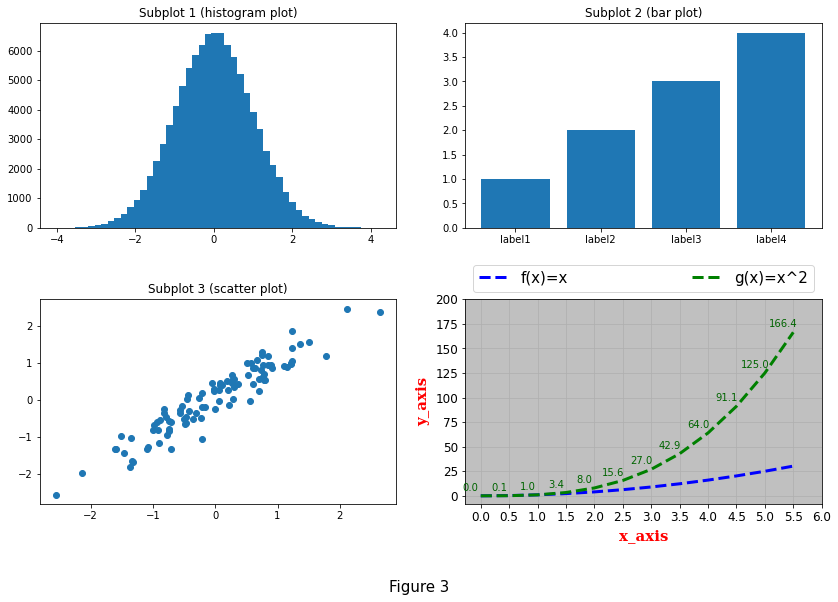

In [5]:
# generate new figure, or activate existing
# (although subplot generates new figure this was used to alter its size)
fig = plt.figure(figsize = (12, 8))
plt.figtext(0.5, -0.05, 'Figure 3', wrap = True, horizontalalignment = 'center', fontsize = 15);

# plot 1: index position 1 in 2x2 grid
plt.subplot(2, 2, 1)   
plt.title('Subplot 1 (histogram plot)')
rng = np.random.default_rng()                                       # instansiate object of numpy generator class
normal_array = rng.normal(0, 1, 100000)                             # get normal standard normal distribution
plt.hist(normal_array, bins = 50)       


# plot 2: index position 2 of 2x2 grid
plt.subplot(2, 2, 2)
plt.title('Subplot 2 (bar plot)')     
plt.bar(['label1', 'label2', 'label3', 'label4'], [1, 2, 3, 4])


# plot 3: index position 3 of 2x2 grid
plt.subplot(2, 2, 3) 
plt.title('Subplot 3 (scatter plot)')
 
# scatter plot data adopted from:
# https://numpy.org/devdocs/reference/random/generated/numpy.random.Generator.multivariate_normal.html
mean = [0, 0]
covariance_matrix = [[1, 0.95], [0.95, 1]]
scatter_data = rng.multivariate_normal(mean, covariance_matrix, 100)  # generate two correlated normal arrays
plt.scatter(scatter_data[:, 0], scatter_data[:, 1])                   # plot col 1 vs. col 2 of 2d array


# plot 4: index position 4 of 2x2 grid
plt.subplot(2, 2, 4)
line_plot()                      # call lineplot function( which pots & applies format)
format_plot()
plt.tight_layout(pad = 2)

string_spacer = [' ' * 11 for i in range(4)]
print('\n{}Here we can see adding additional axes to a figure can be useful for displaying more plots in a grid\n\
{}format. Notice again how the preservation of states is at play as only the last subplot was decorated\n\
{}via the format_plot() call. The object orientated (stateless approach) allows easier access to\n\
{}subplots and will be briefly explored to show its benifit.\n'.format(*string_spacer))    

####  The stateless approach: subplots()

The subplots() function generates a figure similar to subplot(), however the subplots figure can hold an array of axes objects. As described by Nyquist (2020),<br>
these axes object can be retrieved and plotting agruements called on them. This is appose to subplot generated figures that direct plotting aruements to the<br>
axes. See Figure 4 below for the cleaner approach with a higher degree of control.


           With the object orientated approach we can directly reference any axes by indexing its 
           matrix position in the grid. This approach gives a greater degree of control and is
           generally a tidier approach.


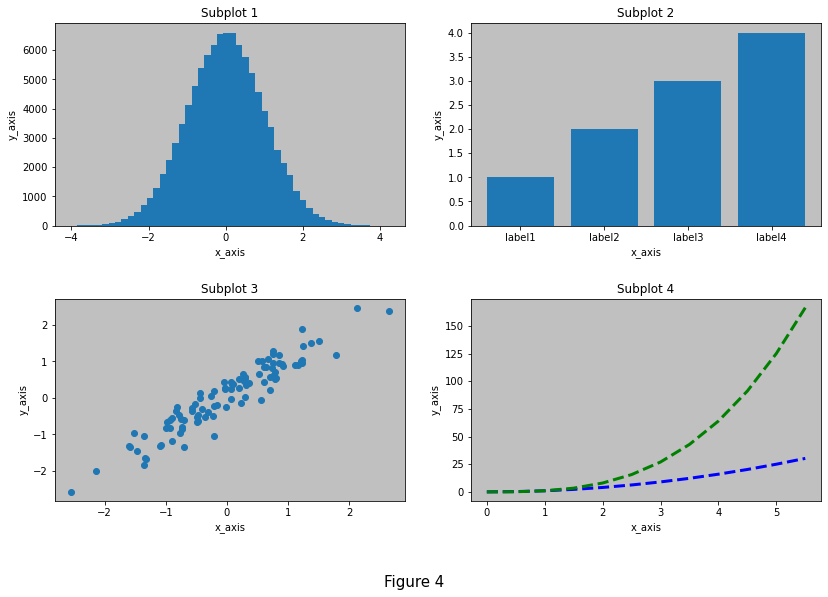

In [6]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8))
plt.figtext(0.5, -0.05, 'Figure 4', wrap = True, horizontalalignment = 'center', fontsize = 15);

# index ax position and call relevant plot functions
axes[0, 0].hist(normal_array, bins = 50)
axes[0, 1].bar(['label1', 'label2', 'label3', 'label4'], [1, 2, 3, 4])
axes[1, 0].scatter(scatter_data[:, 0], scatter_data[:, 1])
axes[1, 1].plot(x, y1, 'b--', linewidth = 3) 
axes[1, 1].plot(x, y2, 'g--', linewidth = 3) 

# loop over axes objects in the figure object
for plot_index, ax in enumerate(fig.axes):  
    ax.set_facecolor('silver')
    ax.set_title(str("Subplot ") + str(plot_index+1))     
    ax.set_xlabel('x_axis')
    ax.set_ylabel('y_axis')
    
fig.tight_layout(pad = 2.5)


string_spacer = [' ' * 11 for i in range(4)]
print('\n{}With the object orientated approach we can directly reference any axes by indexing its \n\
{}matrix position in the grid. This approach gives a greater degree of control and is\n\
{}generally a tidier approach.'.format(*string_spacer))    

## Interesting Plots
***

### Histogram

### Violin Plot

### Scatter Plot

Explanation

In [15]:
import requests as rq

# request image from website
response = rq.get("https://orange3.readthedocs.io/projects/orange-visual-programming/en/latest/_images/ViolinPlot-boxplot.png")

# open binary file and write to Images folder
image = open("Images/boxplot_vs_violin.png", "wb")
image.write(response.content)
image.close()

# image ref:
# Orange Data Mining (2015). Available at: https://orange3.readthedocs.io/projects/orange-visual-programming/en/latest/_images/ViolinPlot-boxplot.png 
# (Accessed 17 December 2021).

<img src="Images/boxplot_vs_violin.png" alt="drawing" width="500"/>

In [8]:
# lets use the iris dataset to generate some data to work with
from sklearn import datasets       # this package contains the iris dataset
import pandas as pd                # for makign a dataframe

iris = datasets.load_iris()        # store dataset in variable
iris_cols = iris.feature_names     # store col names list in variable
iris_targets = iris.target         # store species (numeric format) in targets list

In [9]:
# declare dict which will be used to make df
iris_dict = {iris_cols[0]: iris.data[:, 0], iris_cols[1]: iris.data[:, 1],  iris_cols[2] : iris.data[:, 2], 
             iris_cols[3] : iris.data[:, 3], 'species' : iris_targets}

# pass dict into DataFrame function and store in df variable
df = pd.DataFrame(iris_dict)
df.replace({'species' : { 0 : 'setosa', 1 : 'versicolor', 2 : 'virginica' }}, inplace = True)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
violin_variables = df.columns[:4].to_list()
violin_variables.insert(0, '')
violin_x_ticks = violin_variables
violin_x_ticks

['',
 'sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

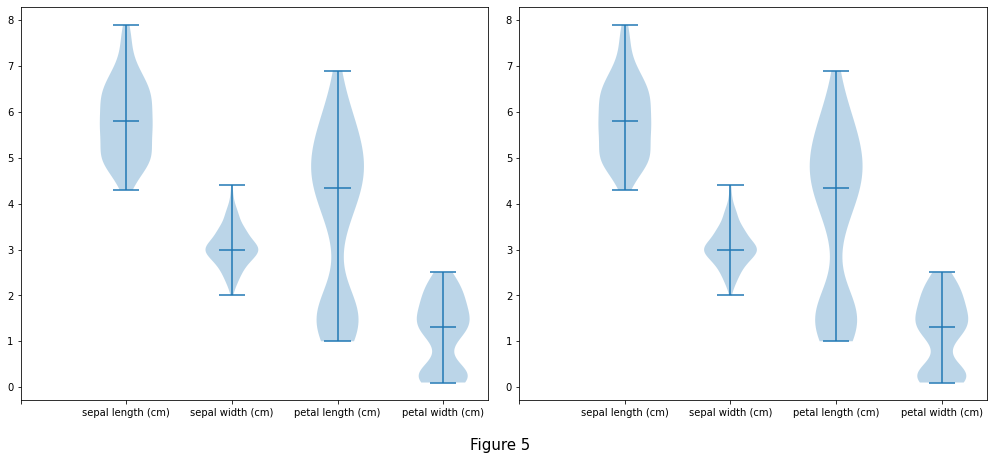

In [28]:
# generate new figure, or activate existing
# (although subplot generates new figure this was used to alter its size)
fig = plt.figure(figsize = (14, 6))
plt.figtext(0.5, -0.05, 'Figure 5', wrap = True, horizontalalignment = 'center', fontsize = 15);

# plot 1: index position 1 in 2x2 grid
plt.subplot(1, 2, 1)   
plt.violinplot(df.iloc[: , :4], showmeans = False, showmedians = True, showextrema = True) 
plt.xticks([i for i in range(5)], violin_x_ticks)



# plot 2: index position 2 of 2x2 grid
plt.subplot(1, 2, 2)
plt.violinplot(df.iloc[: , :4], showmeans = False, showmedians = True, showextrema = True) 
plt.xticks([i for i in range(5)], violin_x_ticks)
plt.tight_layout()
plt.show()

In [31]:
# code customised from:
# https://matplotlib.org/stable/gallery/statistics/customized_violin.html#sphx-glr-gallery-statistics-customized-violin-py


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

    
quartile1, medians, quartile3 = np.percentile(df, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]


inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)


plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

TypeError: '<' not supported between instances of 'str' and 'float'

[0, 1, 2, 3, 4, 5]

"\nparts = ax2.violinplot(\n        data, showmeans=False, showmedians=False,\n        showextrema=False)\n\nfor pc in parts['bodies']:\n    pc.set_facecolor('#D43F3A')\n    pc.set_edgecolor('black')\n    pc.set_alpha(1)\n"

## References<br>

<br>

[1]. What is Matplotlib?, 2021, Available at: 
<br>https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.01-What-is-Matplotlib/<br>
(Accessed 08 October 2021).<br>
<br>


[2].RealPython, 2018, Python Plotting With Matplotlib (Guide), Stateful Versus Stateless Approaches, Available at:<br>
https://realpython.com/python-matplotlib-guide/#stateful-versus-stateless-approaches<br>
(Accessed 15 October 2021).<br>



<br>

[3] J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.<br>

<br>


[4]. Nyquist, K, 2020 plt.subplot() or plt.subplots()? Understanding state-based vs. object-oriented programming in Pyplot,<br>
towards data science, Availabile at: [Ref Link X ](https://towardsdatascience.com/plt-subplot-or-plt-subplots-understanding-state-based-vs-object-oriented-programming-in-pyplot-4ba0c7283f5d) (Accessed 07 December 2021).

<br>

Not yet used: <br>
[X] Nyquist, K 2020, Seeing state-based and object-oriented programming side-by-side, towardsdatascience, viewed x x x,<br>
https://towardsdatascience.com/plt-subplot-or-plt-subplots-understanding-state-based-vs-object-oriented-programming-in-pyplot-4ba0c7283f5d<br>

<br>



<br>


<br>


<br>


<br>

